# Analyse de la polarité des articles

Dans ce markdown, il s'agit d'analyser les articles et d'y inclure l'analyse de leurs polarités

# Importation des données de polarité

## Importation des packages

In [35]:
from datetime import datetime,date,timedelta

# packages for LDA analysis

import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np
# gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
#NLTK stop words

import nltk 
from spacy.lang.fr.stop_words import STOP_WORDS
from wordcloud import WordCloud


import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from scipy.integrate import quad,dblquad


## Importation des données

In [36]:
papers_text = pd.read_csv("Data_pib_polarity.csv", sep="|", encoding = "utf-8")


In [40]:
papers_text.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'date', 'datetime', 'links', 'source',
       'titre', 'intro', 'contenu', 'PIB', 'Word_Tok', 'CommentAferPreproc',
       'polarity'],
      dtype='object')

In [41]:
papers_text = papers_text.drop(papers_text.columns[[0,1,2]], axis= 1)

In [37]:

from textblob import TextBlob
from textblob_fr import PatternAnalyzer, PatternTagger


In [33]:
texte = "je mange du riz"

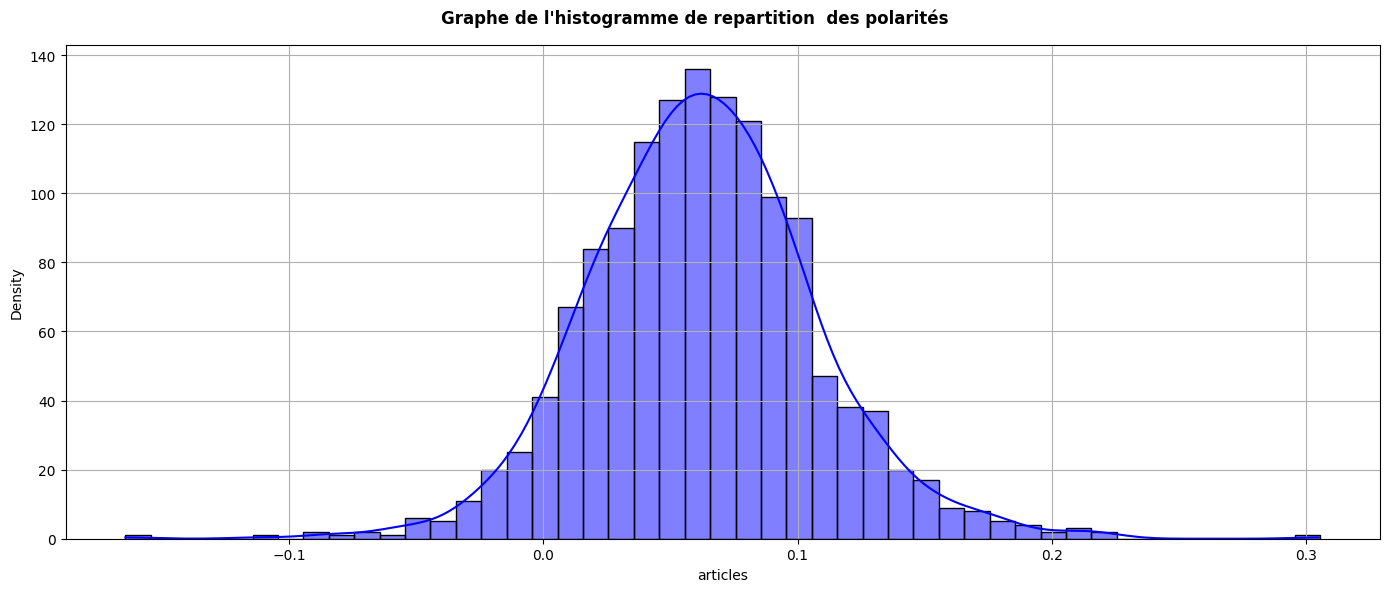

In [42]:
# Histogram and density plot
fig, axes = plt.subplots(figsize=(14,6))
fig.suptitle("Graphe de l'histogramme de repartition  des polarités",fontweight='bold')
sns.histplot(data=papers_text.polarity ,binwidth=0.01,kde=True,label='Kernel density',
             ax=axes,color='blue')
axes.set_xlabel('articles')
axes.set_ylabel('Density')
axes.set_title('',fontweight='bold')
axes.grid(True)
plt.tight_layout()
plt.show()

In [15]:
papers_text.shape

(1369, 11)

In [43]:
negative_article = papers_text.loc[ papers_text.polarity < 0 , : ]
negative_article.shape

(92, 10)

Nous n'avons aucun article qui parle négativement du PIB, nous allons ainsi améliorer ce score.


## Aggrégation des scores par trimestre

Dans cette partie, nous allons agréger les scores par trimestre afin de vérifier l'évolution de ces scores avec le temps

In [44]:
# Convertir la colonne de dates en objets de date
papers_text['datetime'] = pd.to_datetime(papers_text['datetime'])

# Regrouper les données par trimestre et calculer la moyenne
df_quarterly_mean = papers_text.groupby(pd.Grouper(key='datetime', freq='Q')).mean()


C:\Users\yanni\AppData\Local\Temp\ipykernel_34824\588469660.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_quarterly_mean = papers_text.groupby(pd.Grouper(key='datetime', freq='Q')).mean()


In [45]:
df_quarterly_mean.index


DatetimeIndex(['2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31',
               '2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31'],
              dtype='datetime64[ns]', name='datetime', freq='Q-DEC')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


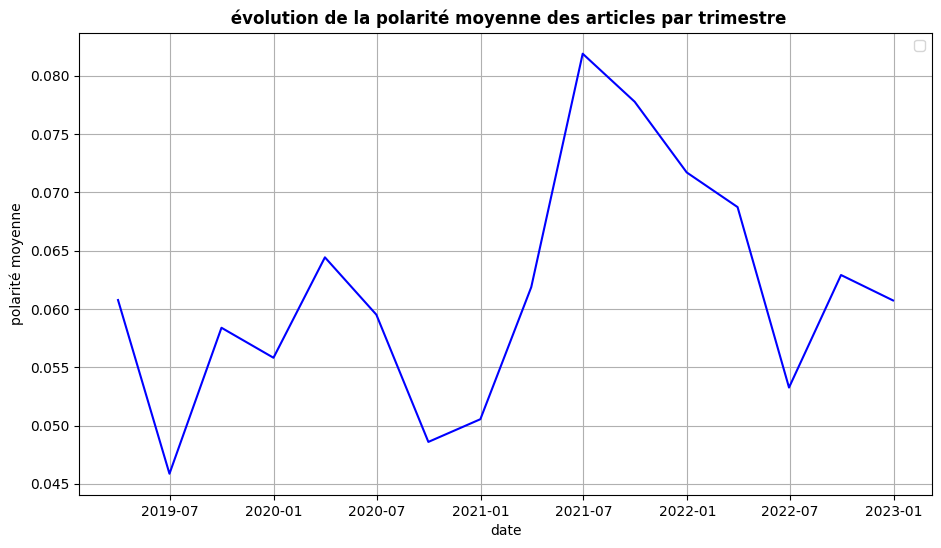

In [46]:

fig,axe = plt.subplots(figsize=(11,6))
axe.plot(df_quarterly_mean.index, df_quarterly_mean.polarity,color='blue')
axe.set_title(' évolution de la polarité moyenne des articles par trimestre',
             fontweight='bold')
axe.set_xlabel('date')
axe.set_ylabel('polarité moyenne')
axe.legend()
axe.grid(True)
plt.show()

Ce graphe est caractérisé par des fluctuations autant positives que négatives. 


Le sentiment moyen chute drastiquement dans le dernier trimestre de 2019 et recommence à croite dans le prémier trimestre 2020. Il décroite drastiquement au deuxième trimestre 2020 ou il est de peu à son niveau minimal.

Il décroit ensuite drastiquement jusqu'à la fin dudeuxièle trimestre 2022 pour remonter depuis lors.